In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
data = {
    "movie" : ["Terminator", "Die Hard", "Delta force", "Terminator",
              "Die Hard", "Terminator", "Delta force","Die Hard"],
    "rating": [9, 6.5, 8.9, 7, 7.8, 5, 8.3, 8]
}
df = pd.DataFrame(data)
df

,movie,rating
0,Terminator,9.0
1,Die Hard,6.5
2,Delta force,8.9
3,Terminator,7.0
4,Die Hard,7.8
5,Terminator,5.0
6,Delta force,8.3
7,Die Hard,8.0


In [27]:
mean = np.mean(df.rating)
median = np.median(df.rating)
mode = df.rating.mode().values[0]

In [28]:
print("ratings Mean: ",mean)
print("\nmean: ", median)

ratings Mean:  7.5625

mean:  7.9


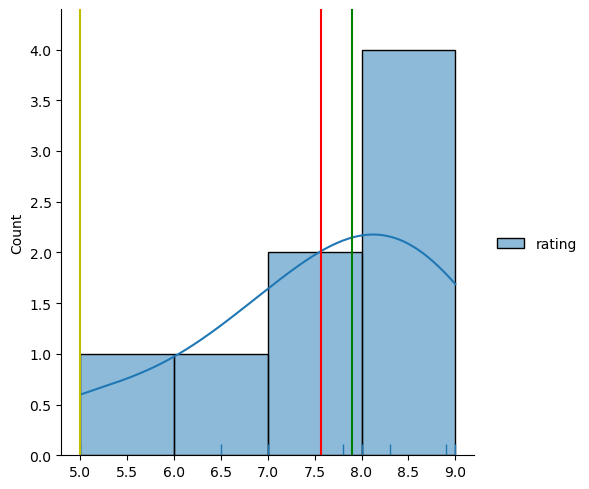

In [29]:
sns.displot(df, kde = True, rug = True)
plt.axvline(mean, color="r", linestyle="-")
plt.axvline(median, color="g", linestyle="-")
plt.axvline(mode, color="y", linestyle="-")

[Text(0.5, 0, '')]

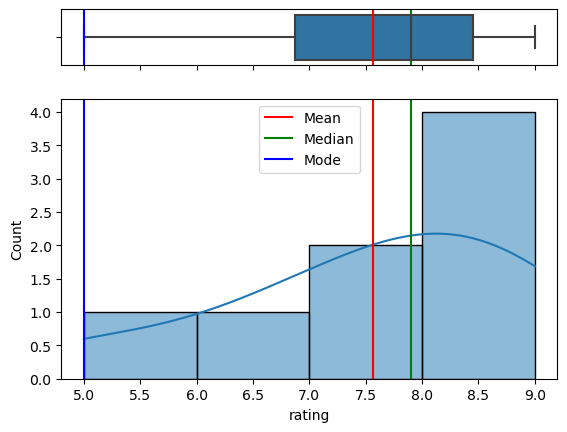

In [30]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
                                  gridspec_kw={"height_ratios": (.2, 1)})

sns.boxplot(data=df, x="rating", ax=ax_box)
ax_box.axvline(mean, color="r", linestyle="-")
ax_box.axvline(median, color="g", linestyle="-")
ax_box.axvline(mode, color="b", linestyle="-")

sns.histplot(data = df, x = "rating", ax = ax_hist, kde = True)
ax_hist.axvline(mean, color = "r", linestyle = "-", label = "Mean")
ax_hist.axvline(median, color = "g", linestyle = "-", label = "Median")
ax_hist.axvline(mode, color = "b", linestyle = "-", label = "Mode")

ax_hist.legend()
ax_box.set(xlabel="")


In [31]:
print("Variance: ", df.rating.var())
print("Stadard devition: ", df.rating.std())


Variance:  1.8083928571428576
Stadard devition:  1.3447649821224739


In [32]:
new_mean = df.groupby(["movie"])["rating"].mean()
new_std = df.groupby(["movie"])["rating"].std()
new_mean

movie
Delta force    8.600000
Die Hard       7.433333
Terminator     7.000000
Name: rating, dtype: float64

In [33]:
new_std

movie
Delta force    0.424264
Die Hard       0.814453
Terminator     2.000000
Name: rating, dtype: float64

TypeError: cannot unpack non-iterable AxesSubplot object

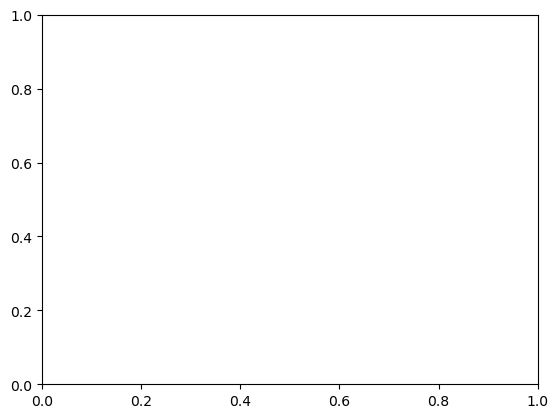

In [43]:
fig, ax = plt.subplot()
new_mean.plot.bar(yerr=new_std, ax=ax, capsize=4)